# 1. Introduction

Describe the approach chosen, reason for choosing it and how you implemented it.

My name is Ali, I chose to implement approach 2. The way requires us to upload our photos for the digit classier to a shared one drive and get the images others have posted. This gives us acces to a larger dataset, which is benefical to model training. The reason I chose this method instead of the duckduckgo method is becasue when I searched 1/2/3/4/5 finger hand it would give me a lot of images with those corresponding finger didgts but also mixed in was wrong images, I dont want to train the modedl on those wrong images therefore I choose the onedrvie way which I know has accurate images and classifications.

I will train a model on the larger dataset and then test them on new images I have taken and record the test accuracy of the best performing model via a confusion matrix. 


In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
!pip install h5py
!pip install typing-extensions
!pip install wheel

In [2]:
!pip install -q fastbook

import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *

# 2. Model training and Results
Any code to train a model and produce results or a reference to the notebook/code file.

In [4]:
path = Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022')
a = path.ls()
a[0]

Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/license.html')

In [5]:
class_types = 'one', 'two', 'three', 'four', 'five'
all_images_path = []
for l in range(len(a)-1):
 ind = l+1
 dest = a[ind]
 for o in class_types:
   img = (dest/o)
   for filename in img.ls():
     all_images_path.append(filename)
     if filename.suffix.lower() != '.jpg':
      print(filename)


In [6]:
len(all_images_path)
# I could use all_images_path or fns, they have the same content

1753

In [7]:
fns = get_image_files(path)
fns

(#1753) [Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/digits-056/three/00000015.jpg'),Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/digits-056/three/00000010.jpg'),Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/digits-056/three/00000019.jpg'),Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/digits-056/three/00000004.jpg'),Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/digits-056/three/00000022.jpg'),Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/digits-056/three/00000012.jpg'),Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/digits-056/three/00000028.jpg'),Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/digits-056/three/00000020.jpg'),Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/digits-056/three/00000003.jpg'),Path('/content/gdrive/MyDrive/lab_5/OneDrive_2_4-2-2022/digits-056/three/00000016.jpg')...]

In [8]:
fingers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #image->discrete category
    get_items=get_image_files, # path->images
    get_y=parent_label, # get the label from the directory name
    item_tfms=Resize(640),
    batch_tfms = aug_transforms(
  do_flip = True,
  flip_vert = True,
  max_rotate = 2,
  min_zoom = 1,
  max_zoom = 1.1,
  max_lighting = 0.1,
  max_warp = 0.1,
  min_scale = 1
) )

In [9]:
dls = fingers.dataloaders(path, batch_size = 32)

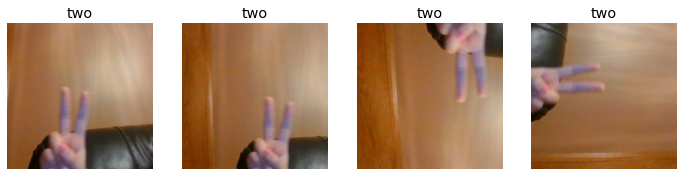

In [10]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

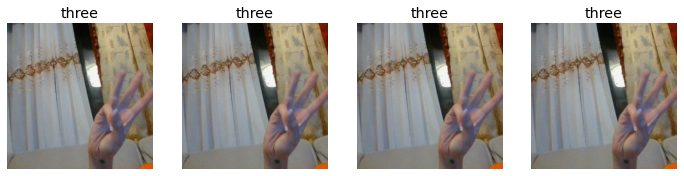

In [11]:
dls.valid.show_batch(max_n=4, nrows=1, unique=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.00363078061491251)

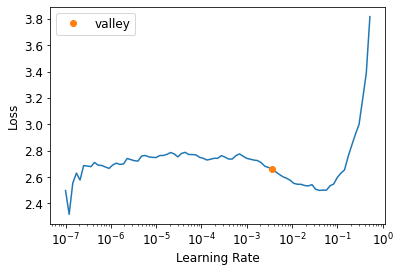

In [12]:
learn = cnn_learner(dls, resnet18, metrics = accuracy )
learn.lr_find()

In [25]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(1, 3e-3 )
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-3,5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.985882,1.051466,0.611429,00:47


epoch,train_loss,valid_loss,accuracy,time
0,1.944195,2.667969,0.331429,00:57
1,1.518644,0.746352,0.722857,00:58


I used trained more than one model and saved them as pkl files to my google drive. The model that I chose to use for as the final model was my 96 percent accurate, resnset18 model that I tranined for 1 cycle frozen and 9 cycles unfroozen. The reason I wanted to test out more than one was to see the effects having smaller training epochs would have on model performance.

In [26]:
path_m = Path('/content/gdrive/MyDrive/lab_5/')
if not (path_m/'models').exists():
  (path_m/'models').mkdir()

In [27]:
learn.export(fname=(path_m/"models/01_02.pkl"))

In [28]:
model_path = Path('/content/gdrive/MyDrive/lab_5/models')
model_path.ls()

(#2) [Path('/content/gdrive/MyDrive/lab_5/models/01_09_96.pkl'),Path('/content/gdrive/MyDrive/lab_5/models/01_02.pkl')]

In [48]:
learn_02 = load_learner(model_path/'01_09_96.pkl')
learn_02

In [30]:
path_img = Path('/content/gdrive/MyDrive/lab_5/Lab_5_test')
path_img.ls()

(#5) [Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/four'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/two'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/five'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/one'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/three')]

In [31]:
test_path = get_image_files(path_img)
test_path

(#25) [Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/four/00000001.jpg'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/four/00000003.jpg'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/four/00000002.jpg'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/four/00000004.jpg'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/four/00000005.jpg'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/two/00000001.jpg'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/two/00000002.jpg'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/two/00000003.jpg'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/two/00000004.jpg'),Path('/content/gdrive/MyDrive/lab_5/Lab_5_test/two/00000005.jpg')...]

In [49]:
a =[]
actual = []
predicted = []
t = 0
    
for i in test_path:
    pred,_,__ = learn_02.predict(i)
    predicted.append(pred)
        
    ii = str(i)
    a.append(ii[41:44])
  
for e in a:
  if e == 'fiv':
      actual.append('five')
    
  elif e == 'fou':
      actual.append('four')
        
  elif e == 'thr':
      actual.append('three')
        
  else:
      actual.append(e)

print('Actual', actual)
print('Predicted', predicted)

Actual ['four', 'four', 'four', 'four', 'four', 'two', 'two', 'two', 'two', 'two', 'five', 'five', 'five', 'five', 'five', 'one', 'one', 'one', 'one', 'one', 'three', 'three', 'three', 'three', 'three']
Predicted ['four', 'four', 'four', 'four', 'four', 'two', 'two', 'two', 'two', 'two', 'five', 'five', 'five', 'five', 'five', 'one', 'one', 'one', 'two', 'two', 'three', 'two', 'three', 'three', 'three']


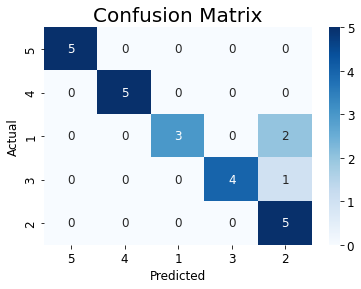

In [50]:
cf_matrix = confusion_matrix(actual, predicted)
ploo = sns.heatmap(cf_matrix, annot=True, cmap='Blues',
           xticklabels=['5','4','1','3','2'], yticklabels=['5','4','1','3','2'],
                  )
plt.title("Confusion Matrix", fontsize =20)
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.show() 

In [51]:
acc = (22/25)*100
acc
#diagonal divided by total


88.0

# 3. Summary and Conclusion
Summarize your new results and state your lab3 and lab4 results.


Conclusion: How large is the improvement in the performance of the classifier due to the approach chosen? Include your interpretation why it worked (or did not work).

There was a huge improvemnt in the accuracy of the model from lab 4 to lab 5. Now our model has an accuracy of 88 percent while before it had an accuracy of 40 percent. I belive the jump in accuracy is due to the model being given more data in lab 5 since I had access to the one drive, whereas for lab 4 I just had 40 of my own images. 

My hypothesis, and many others Im sure, going into this lab was if we give the model more data then it will perfom better on the test images. And this turned out to be true for this case.

My guess for future work could be to try using larger layer resnets, like resnet 34. I could also try giving more images and see how much it improves next time.

# 4. Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*I like the fact that we were able to improve our model from lab 4. It was very fulfilling to see the model become so much better and put our skills we learned throughout the year to good use. 

Since it is the end of the year I also want to say how much I enjoyed 410 and 411, thank you to all the TAs and Professor P for your hard work!*

